<a href="https://colab.research.google.com/github/danon6868/BI-ml-course/blob/main/lecture_9_cnn_part1/homework/hw_cnn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1. Свёртка

**5 баллов**

Реализуйте функцию свёртки `conv(x, kernel, stride, pad)`, где:


* $\text{x}$: Двумерный массив размером $(W,H)$;
* $\text{kernel}$: ядро свёртки размером $(K, K)$;
* $\text{stride}$: шаг ядра свёртки. $0 < \text{stride} \leq \min(W,H)$;
* $\text{pad}$: ширина дополнения с каждой из сторон массива. $\text{pad} > 0$.

Результатм работы функции является возвращение следующего значения:
* $out$: Результат свертки входных данных $\text{x}$, имеющий размер $(H', W')$: 
  - $H' = 1 + (H + 2 \cdot pad - K)\ //\  stride$;
  - $W' = 1 + (W + 2 \cdot pad - K)\  //\ stride$.

---

Воспользуйтесь созданной функцией `conv` для применения [оператора Собеля](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F) 
к изображению, после чего выведите результат на экран.

Можно работать и с `numpy`, и с `torch`, как вам угодно.

In [1]:
import torch
import numpy as np
import random

In [2]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [3]:
# Можете тренироваться на этом примере
a = np.arange(9).reshape((3, 3))
M = np.block([[a, a],[a, a]])
print(M)

[[0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]
 [0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]]


In [5]:
# how to apply kernel:
# https://numpy.org/doc/stable/reference/generated/numpy.multiply.html
np.sum(np.multiply(np.array([1,2,3,5]), np.array([1, -1, 0, 2])))

9

In [7]:
# https://youtu.be/8EGjN8WzRSI?list=PLjKdf6AHvR-FlMDSANHZQVkrq2FKFFlhC&t=1290

def conv(x, kernel, stride, pad):
    # YOUR CODE IS HERE
    W, H, K = x.shape[0], x.shape[1], kernel.shape[0]
    w = 1 + (W + 2*pad - K) // stride
    h = 1 + (H + 2*pad - K) // stride

    x_padded = np.zeros((W + pad*2, H + pad*2))
    x_padded[pad:-pad, pad:-pad] = x

    res = np.zeros((w, h))
    for i in range(0, W - K + 2*pad + 1, stride):
      for j in range(0, H - K + 2*pad +1, stride):
        res[i//stride, j//stride] = np.sum(np.multiply(x_padded[i:i+K, j:j+K], kernel))
    
    return res

In [8]:
conv(np.array([[1,]]), np.ones((2,2)), stride=1, pad=1)

array([[1., 1.],
       [1., 1.]])

In [9]:
conv(np.array([[1,1,], [1,1,]]), np.ones((2,2)), stride=1, pad=1)

array([[1., 2., 1.],
       [2., 4., 2.],
       [1., 2., 1.]])

In [10]:
conv(np.array([[1,2,3], [4,5,6], [7,8,9]]), np.ones((2,2)), stride=1, pad=1)

array([[ 1.,  3.,  5.,  3.],
       [ 5., 12., 16.,  9.],
       [11., 24., 28., 15.],
       [ 7., 15., 17.,  9.]])

In [11]:
sobel_kernel_vert = torch.Tensor([
                                  [-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]
])


sobel_kernel_hor = torch.Tensor([
                                 [-1, -2, -1],
                                 [0, 0, 0],
                                 [1, 2, 1]
])

Примените эти два фильтра к следующей картинке и нарисуйте полученные результаты:

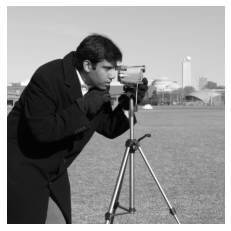

In [12]:
from skimage import data
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 4, 4

camera = data.camera()
plt.figure()
plt.imshow(camera.astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

Let's apply these two kernels to the picture with different `stride` and `pad` values:

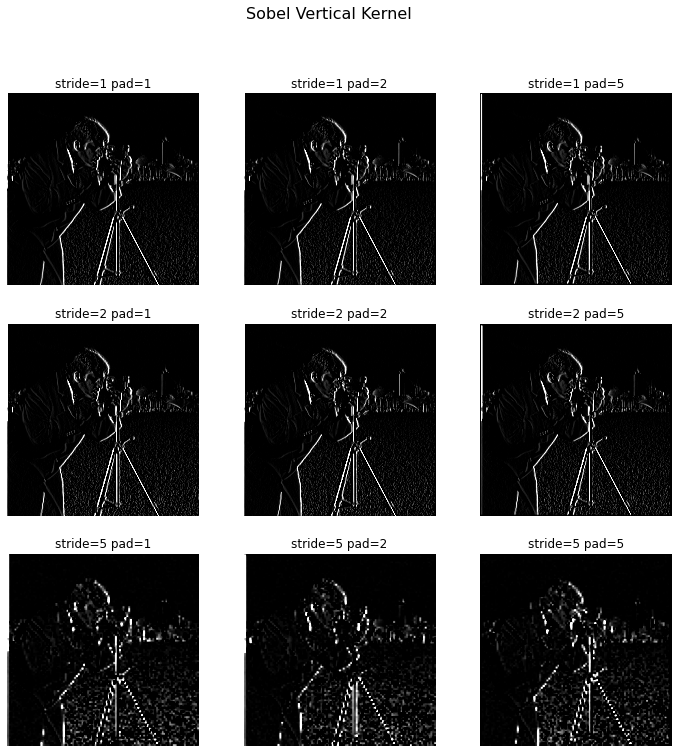

In [13]:
plt.rcParams["figure.figsize"] = 12, 12

fig, axs = plt.subplots(3, 3)
for row, stride in enumerate([1, 2, 5]):
  for col, pad in enumerate([1, 2, 5]):
    img_filtered = conv(camera.astype('int'), sobel_kernel_vert.numpy(), stride=stride, pad=pad)
    axs[row, col].imshow(img_filtered, cmap="gray", vmin=0, vmax=255)
    axs[row, col].set_title(f"stride={stride} pad={pad}")
    axs[row, col].axis('off')

# plt.tight_layout()
fig.suptitle("Sobel Vertical Kernel", fontsize=16);

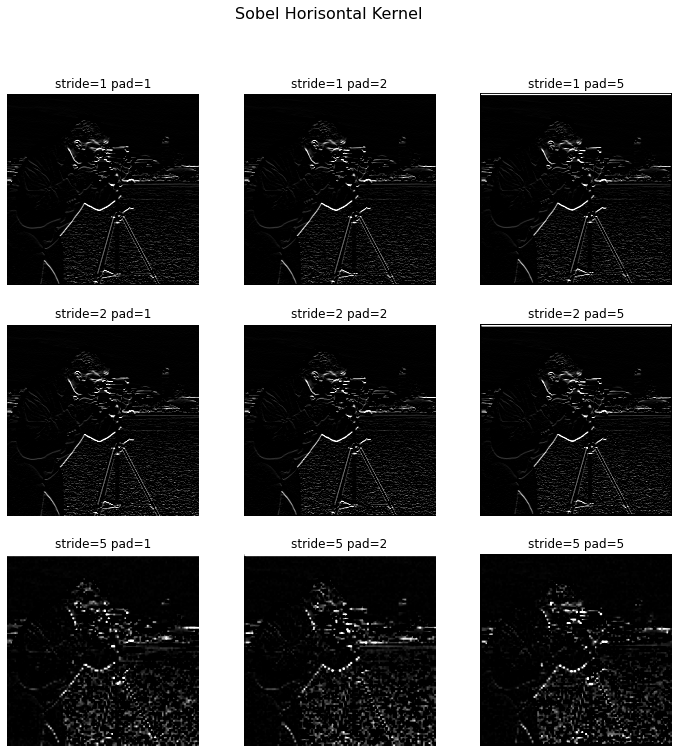

In [14]:
plt.rcParams["figure.figsize"] = 12, 12

fig, axs = plt.subplots(3, 3)
for row, stride in enumerate([1, 2, 5]):
  for col, pad in enumerate([1, 2, 5]):
    img_filtered = conv(camera.astype('int'), sobel_kernel_hor.numpy(), stride=stride, pad=pad)
    axs[row, col].imshow(img_filtered, cmap="gray", vmin=0, vmax=255)
    axs[row, col].set_title(f"stride={stride} pad={pad}")
    axs[row, col].axis('off')

fig.suptitle("Sobel Horisontal Kernel", fontsize=16);

Допишите код ниже и проинтерпретируйте полученный результат:

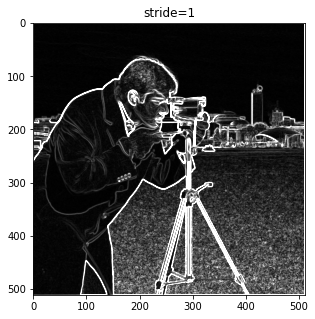

In [15]:
plt.rcParams["figure.figsize"] = 5, 5
camera_s_hor_filter = conv(camera.astype('int'), sobel_kernel_hor.numpy(), stride=1, pad=1) # результат применения sobel_kernel_hor
camera_s_vert_filter = conv(camera.astype('int'), sobel_kernel_vert.numpy(), stride=1, pad=1) # результат применения sobel_kernel_vert
camera_with_borders = np.sqrt(camera_s_hor_filter**2 + camera_s_vert_filter**2)
plt.imshow(camera_with_borders, cmap="gray", vmin=0, vmax=255)
plt.title("stride=1");

Edge detection algorithm!! 🔲 🔳

<https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html>

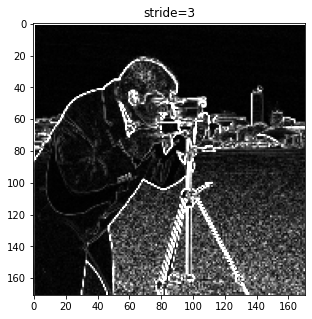

In [16]:
# stride=3
camera_s_hor_filter = conv(camera.astype('int'), sobel_kernel_hor.numpy(), stride=3, pad=1) # результат применения sobel_kernel_hor
camera_s_vert_filter = conv(camera.astype('int'), sobel_kernel_vert.numpy(), stride=3, pad=1) # результат применения sobel_kernel_vert
camera_with_borders = np.sqrt(camera_s_hor_filter**2 + camera_s_vert_filter**2)
plt.imshow(camera_with_borders, cmap="gray", vmin=0, vmax=255)
plt.title("stride=3");

## Задание 2. AlexNet

**15 баллов**

Воссоздайте архитектуру `AlexNet` для определения заболевания растения. Датасеты уже созданы ниже.

In [17]:
import torch

INPUT_IMAGE_SIZE = 227
BATCH_SIZE = 64
N_EPOCHS = 10 # можно будет при желании увеличить
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [18]:
from IPython.display import clear_output

from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose, ToPILImage
from torchvision.transforms import Normalize, Resize

from glob import glob
from torch import nn
from torch.nn import functional as F
import torch
import os
 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [19]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

clear_output()

In [20]:
!unzip train.zip
!unzip validation.zip
!unzip test.zip

clear_output()

In [21]:
class BeanDataset(Dataset):
    def __init__(self, img_dir, side_size=INPUT_IMAGE_SIZE):
        # папка с картинками
        self.img_dir = img_dir
        # отсортированный список с названиями файлов
        self.files = sorted(glob(f'{img_dir}/*/*.jpg'))
        class_names = sorted(os.listdir(img_dir))
        # названия папок с картинками переведем в номера классов
        self.class_dir = {name:idx for idx, name in enumerate(class_names)}
        self._number_to_labels = {idx:name for idx, name in enumerate(class_names)}

        # трансформации данных: мы изменяем размер,
        # так как AlexNet работает с картинками 227 на 227 пикселей
        self.transforms = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor(),
                                  Normalize(
                                      mean = [0.5183, 0.4845, 0.6570],
                                      std = [0.2111, 0.2227, 0.2291]
                                  )])
        self._transforms_for_plot = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor()
                                  ])


    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx, normalize=True):
        file_path = self.files[idx]
        image = read_image(file_path).type(torch.DoubleTensor)

        # применяем трансформации
        if normalize:
            transformed_img = self.transforms(image)
        # there was an error here ;) I fixed it :)
        else:
            transformed_img = self._transforms_for_plot(image)
        
        label_name = file_path.split('/')[-2]
        label = self.class_dir[label_name]
        
        # как обычно возвращаем картинку и номер класса
        return transformed_img, label

In [22]:
train_dataset = BeanDataset("./train/")
valid_dataset = BeanDataset("./validation/")
test_dataset = BeanDataset("./test/")

trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [23]:
print("our classes:", train_dataset.class_dir)

from collections import defaultdict

class_samples_counts = defaultdict(int)
for image, label in train_dataset:
  class_samples_counts[label] += 1
print("class samples:", class_samples_counts)

our classes: {'angular_leaf_spot': 0, 'bean_rust': 1, 'healthy': 2}
class samples: defaultdict(<class 'int'>, {0: 345, 1: 348, 2: 341})


Посмотрим на наши картинки:

(код довольно эзотерический, но у меня было такое настроение)

In [24]:
valid_dataset[10][0].shape, valid_dataset[10][1]

(torch.Size([3, 227, 227]), 0)

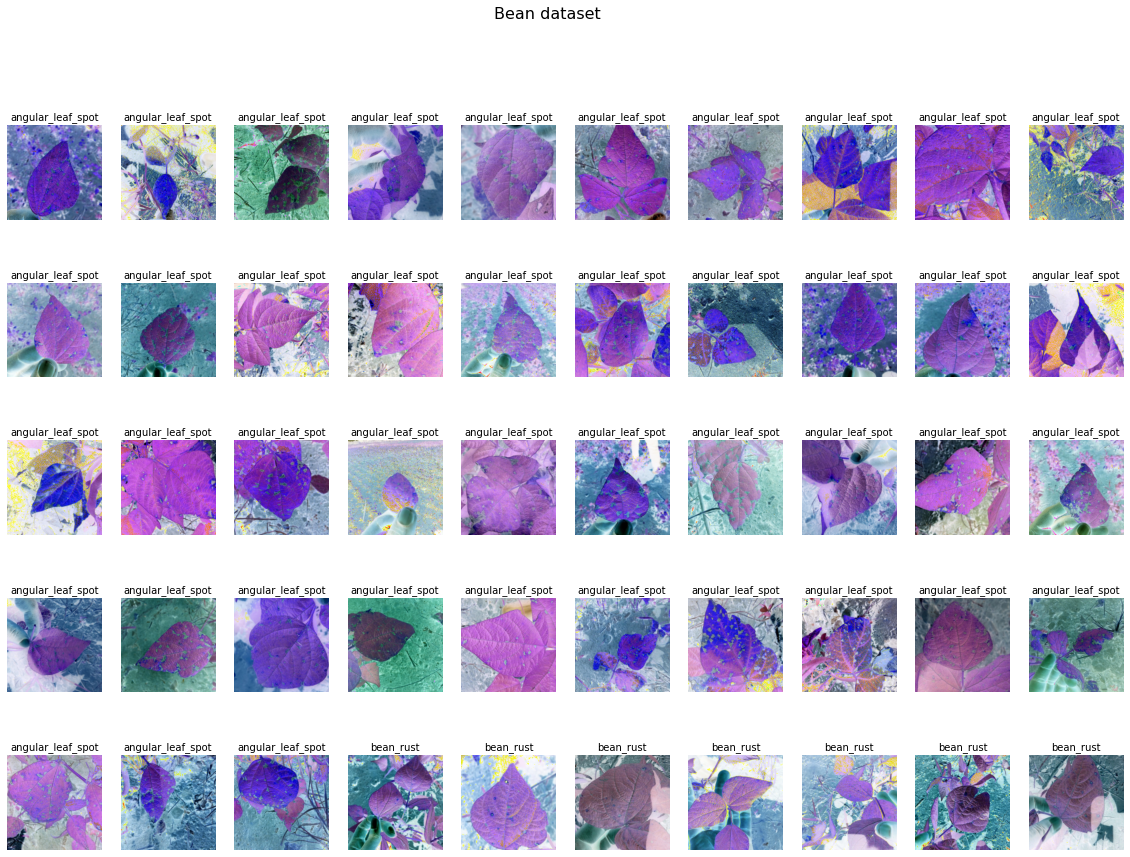

In [25]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    title = valid_dataset._number_to_labels[valid_dataset.__getitem__(index, normalize=False)[1]]
    plt.title(title, fontsize=10)
    
fig.suptitle("Bean dataset", fontsize=16);

### Реализация `AlexNet`

В лекции мы познакомились с архитектурой `AlexNet`, теперь пришло время реализовать ее самостоятельно. Важно, что на выходе число классов у нас будет сильно меньше чем 1000, нужно будет в начале это определить. Везде в качестве активации используется `ReLU`.

Также обратите внимание на параметры пулинга, тут ядро 3х3 со страйдом 2 (поэтому он называется overlapping).

Картинка может немного отличаться от того, что было на лекции, ориентируйтесь на картинку в ноутбуке.

Внимательно смотрите на параметры сверток (например, padding / stride).

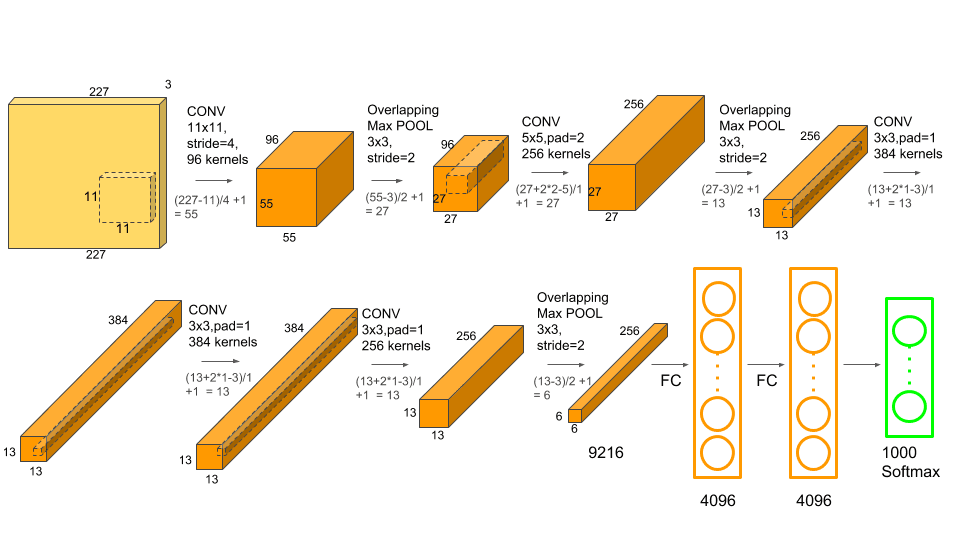

In [26]:
N_CLASSES = 3 # определите число классов в данных
LEARNING_RATE = 3e-4 # можно подобрать как-то другой)

[Nueral Network Zoo](https://www.asimovinstitute.org/neural-network-zoo/)   👾 🟡 🟢 🔵 🔴




In [27]:
class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()
        # YOUR CODE IS HERE

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            )
        self.classifier = nn.Sequential(
            nn.Linear(in_features=256*6*6, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=3),
        )

    def forward(self,x):
        # YOUR CODE IS HERE
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

Возьмите код для обучения и валидации модели, который был на лекции (если захочется, то его можно как угодно менять). В лекции мы возвращали из модели помимо логитов еще и вероятности классов, чтобы потом рисовать красивые картинки. Если захотите сделать также, то учтите это.

In [28]:
def train_epoch(train_loader, model, criterion, optimizer, device):
    """
    Function for the training step of the training loop
    """

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:

        optimizer.zero_grad()
        
        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

        loss.backward()
        optimizer.step()
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss


def validate_epoch(valid_loader, model, criterion, device):
    """
    Function for the validation step of the training loop
    """
   
    model.eval()
    running_loss = 0
    
    for X, y_true in valid_loader:
    
        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss


def get_accuracy(model, dataloader, device):
    """
    model - 
    dataloader - 
    """
    correct = 0
    total = 0
    with torch.no_grad(): # Тензоры внутри этого блока будут иметь requires_grad=False
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    
    return accuracy


def plot_losses(train_losses, valid_losses):
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=train_losses, label="Train Loss")
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=valid_losses, label="Validation Loss")


def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    """
    Function defining the entire training loop
    """

    best_loss = 1e10
    train_losses = []
    valid_losses = []
 
    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train_epoch(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate_epoch(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            
            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)
                
            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)
    
    return model, train_losses, valid_losses

Выберите функцию потерь и оптимизатор и обучите полученную модель на тренировочных данных, параллельно проверяя ее на валидационной части:

13:25:46 --- Epoch: 0	Train loss: 68.7652	Valid loss: 1.0989	Train accuracy: 33.66	Valid accuracy: 33.83
13:26:12 --- Epoch: 1	Train loss: 1.0997	Valid loss: 1.0992	Train accuracy: 33.66	Valid accuracy: 33.83
13:26:39 --- Epoch: 2	Train loss: 1.0992	Valid loss: 1.0988	Train accuracy: 33.37	Valid accuracy: 33.08
13:27:07 --- Epoch: 3	Train loss: 1.0991	Valid loss: 1.0986	Train accuracy: 33.66	Valid accuracy: 33.83
13:27:35 --- Epoch: 4	Train loss: 1.0994	Valid loss: 1.0986	Train accuracy: 33.66	Valid accuracy: 33.83
13:28:02 --- Epoch: 5	Train loss: 1.0989	Valid loss: 1.0986	Train accuracy: 33.66	Valid accuracy: 33.83
13:28:30 --- Epoch: 6	Train loss: 1.0987	Valid loss: 1.0986	Train accuracy: 33.66	Valid accuracy: 33.83
13:28:57 --- Epoch: 7	Train loss: 1.0987	Valid loss: 1.0988	Train accuracy: 33.66	Valid accuracy: 33.83
13:29:24 --- Epoch: 8	Train loss: 1.1002	Valid loss: 1.0989	Train accuracy: 33.66	Valid accuracy: 33.83
13:29:50 --- Epoch: 9	Train loss: 1.0989	Valid loss: 1.0986	Tra

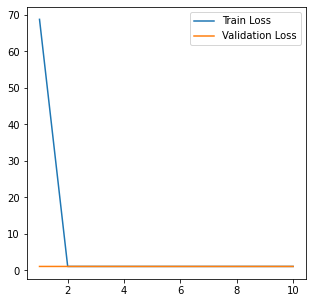

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

13:30:19 --- Epoch: 0	Train loss: 1.7316	Valid loss: 0.9872	Train accuracy: 53.58	Valid accuracy: 50.38
13:30:47 --- Epoch: 1	Train loss: 1.0148	Valid loss: 0.8975	Train accuracy: 51.64	Valid accuracy: 48.12
13:31:15 --- Epoch: 2	Train loss: 0.9804	Valid loss: 0.9740	Train accuracy: 52.80	Valid accuracy: 48.87
13:31:43 --- Epoch: 3	Train loss: 0.8705	Valid loss: 0.8610	Train accuracy: 55.03	Valid accuracy: 51.88
13:32:11 --- Epoch: 4	Train loss: 0.8455	Valid loss: 0.8557	Train accuracy: 65.96	Valid accuracy: 68.42
13:32:38 --- Epoch: 5	Train loss: 0.7952	Valid loss: 0.7186	Train accuracy: 70.21	Valid accuracy: 69.92
13:33:06 --- Epoch: 6	Train loss: 0.7093	Valid loss: 0.6859	Train accuracy: 71.86	Valid accuracy: 72.18
13:33:34 --- Epoch: 7	Train loss: 0.6793	Valid loss: 0.6870	Train accuracy: 74.08	Valid accuracy: 71.43
13:34:01 --- Epoch: 8	Train loss: 0.5919	Valid loss: 0.6254	Train accuracy: 77.95	Valid accuracy: 74.44
13:34:28 --- Epoch: 9	Train loss: 0.5347	Valid loss: 0.5441	Trai

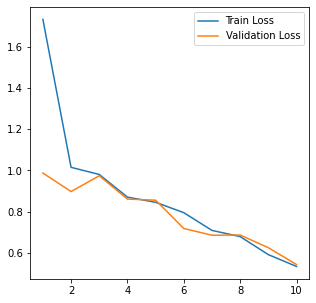

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

13:34:57 --- Epoch: 0	Train loss: 1.0251	Valid loss: 0.8970	Train accuracy: 62.48	Valid accuracy: 60.15
13:35:24 --- Epoch: 1	Train loss: 0.8214	Valid loss: 1.1078	Train accuracy: 62.38	Valid accuracy: 56.39
13:35:53 --- Epoch: 2	Train loss: 0.7952	Valid loss: 0.7920	Train accuracy: 68.47	Valid accuracy: 63.91
13:36:20 --- Epoch: 3	Train loss: 0.6972	Valid loss: 0.6728	Train accuracy: 70.99	Valid accuracy: 74.44
13:36:48 --- Epoch: 4	Train loss: 0.7024	Valid loss: 0.6890	Train accuracy: 73.02	Valid accuracy: 68.42
13:37:15 --- Epoch: 5	Train loss: 0.6514	Valid loss: 0.9572	Train accuracy: 66.25	Valid accuracy: 66.92
13:37:42 --- Epoch: 6	Train loss: 0.6204	Valid loss: 0.6415	Train accuracy: 74.66	Valid accuracy: 72.93
13:38:10 --- Epoch: 7	Train loss: 0.6351	Valid loss: 0.6102	Train accuracy: 74.95	Valid accuracy: 76.69
13:38:37 --- Epoch: 8	Train loss: 0.5636	Valid loss: 0.5914	Train accuracy: 80.85	Valid accuracy: 74.44
13:39:04 --- Epoch: 9	Train loss: 0.5107	Valid loss: 0.6066	Trai

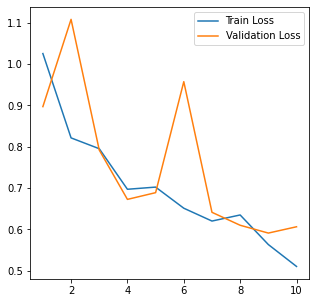

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

13:39:33 --- Epoch: 0	Train loss: 0.9748	Valid loss: 0.9189	Train accuracy: 57.64	Valid accuracy: 57.89
13:40:00 --- Epoch: 1	Train loss: 0.8351	Valid loss: 0.7504	Train accuracy: 67.79	Valid accuracy: 66.17
13:40:28 --- Epoch: 2	Train loss: 0.7303	Valid loss: 0.6882	Train accuracy: 70.99	Valid accuracy: 70.68
13:40:55 --- Epoch: 3	Train loss: 0.6689	Valid loss: 0.6742	Train accuracy: 73.21	Valid accuracy: 72.18
13:41:22 --- Epoch: 4	Train loss: 0.6335	Valid loss: 0.6646	Train accuracy: 74.66	Valid accuracy: 75.19
13:41:50 --- Epoch: 5	Train loss: 0.5921	Valid loss: 0.6219	Train accuracy: 76.69	Valid accuracy: 75.19
13:42:18 --- Epoch: 6	Train loss: 0.5328	Valid loss: 0.7289	Train accuracy: 75.34	Valid accuracy: 69.17
13:42:46 --- Epoch: 7	Train loss: 0.6162	Valid loss: 0.6250	Train accuracy: 77.18	Valid accuracy: 75.19
13:43:14 --- Epoch: 8	Train loss: 0.5346	Valid loss: 0.5739	Train accuracy: 81.53	Valid accuracy: 75.19
13:43:41 --- Epoch: 9	Train loss: 0.5294	Valid loss: 0.5429	Trai

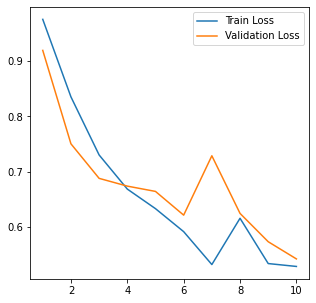

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

13:44:09 --- Epoch: 0	Train loss: 0.9930	Valid loss: 0.8785	Train accuracy: 59.67	Valid accuracy: 59.40
13:44:36 --- Epoch: 1	Train loss: 0.8005	Valid loss: 0.7463	Train accuracy: 67.89	Valid accuracy: 70.68
13:45:03 --- Epoch: 2	Train loss: 0.7245	Valid loss: 0.6959	Train accuracy: 70.70	Valid accuracy: 67.67
13:45:31 --- Epoch: 3	Train loss: 0.6769	Valid loss: 0.8559	Train accuracy: 66.92	Valid accuracy: 63.91
13:45:59 --- Epoch: 4	Train loss: 0.6518	Valid loss: 0.7827	Train accuracy: 70.41	Valid accuracy: 69.17
13:46:27 --- Epoch: 5	Train loss: 0.6862	Valid loss: 0.6585	Train accuracy: 72.63	Valid accuracy: 72.18
13:46:55 --- Epoch: 6	Train loss: 0.6359	Valid loss: 0.7637	Train accuracy: 71.08	Valid accuracy: 66.17
13:47:22 --- Epoch: 7	Train loss: 0.6080	Valid loss: 0.6175	Train accuracy: 74.56	Valid accuracy: 75.19
13:47:49 --- Epoch: 8	Train loss: 0.6128	Valid loss: 0.6249	Train accuracy: 77.08	Valid accuracy: 75.19
13:48:16 --- Epoch: 9	Train loss: 0.5469	Valid loss: 0.6079	Trai

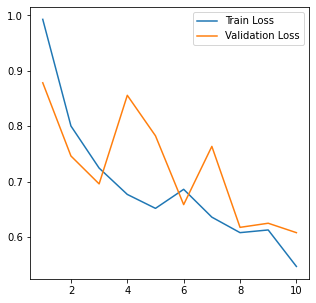

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

14:44:15 --- Epoch: 0	Train loss: 1.0912	Valid loss: 1.0759	Train accuracy: 67.02	Valid accuracy: 66.92
14:44:40 --- Epoch: 1	Train loss: 1.0426	Valid loss: 0.9941	Train accuracy: 60.54	Valid accuracy: 61.65
14:45:05 --- Epoch: 2	Train loss: 0.9006	Valid loss: 0.8109	Train accuracy: 68.38	Valid accuracy: 63.16
14:45:30 --- Epoch: 3	Train loss: 0.7487	Valid loss: 0.7167	Train accuracy: 70.21	Valid accuracy: 69.92
14:45:55 --- Epoch: 4	Train loss: 0.7214	Valid loss: 0.6775	Train accuracy: 70.99	Valid accuracy: 75.19
14:46:20 --- Epoch: 5	Train loss: 0.6943	Valid loss: 0.6707	Train accuracy: 70.50	Valid accuracy: 72.18
14:46:45 --- Epoch: 6	Train loss: 0.6852	Valid loss: 0.6789	Train accuracy: 70.60	Valid accuracy: 72.18
14:47:10 --- Epoch: 7	Train loss: 0.6984	Valid loss: 0.6618	Train accuracy: 72.44	Valid accuracy: 73.68
14:47:35 --- Epoch: 8	Train loss: 0.6489	Valid loss: 0.6438	Train accuracy: 72.53	Valid accuracy: 75.94
14:48:00 --- Epoch: 9	Train loss: 0.6348	Valid loss: 0.6349	Trai

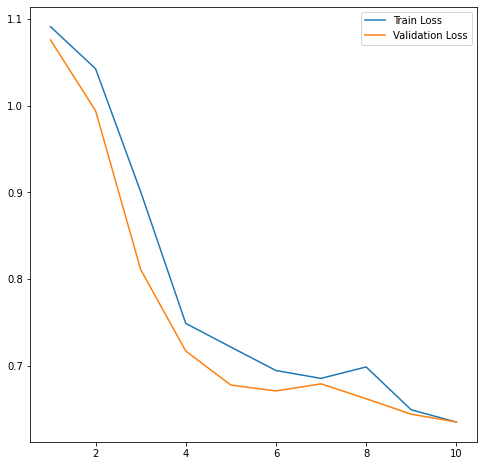

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

Если вы все реализовали правильно, то `accuracy` на валидации должна быть в районе 0.8.

**Conclusions:**

So we have several models trained with different learning rate, from 0.00001 - 0.003.

lr = 0.003 - produces model which accuracy doesn't depend on epoch. It's not overfitted yet, right? But gradient descent cannot find local minimum, I think it overjumps it over when learning rate is big. 

Eventually lower learning rate gives better results: 0.00005 -> 78%.
Train accuracy is slightly greater than valid accuracy, so the mode isn't overfitted.

One could tune some hyperparameters with [RayTune](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html), however it feels like a separate homework at that stage :)







### Визуализация предсказаний

Визуализируем предсказания нашей модели и степень уверенности в них. Сделайте выводы о качестве полученной модели.

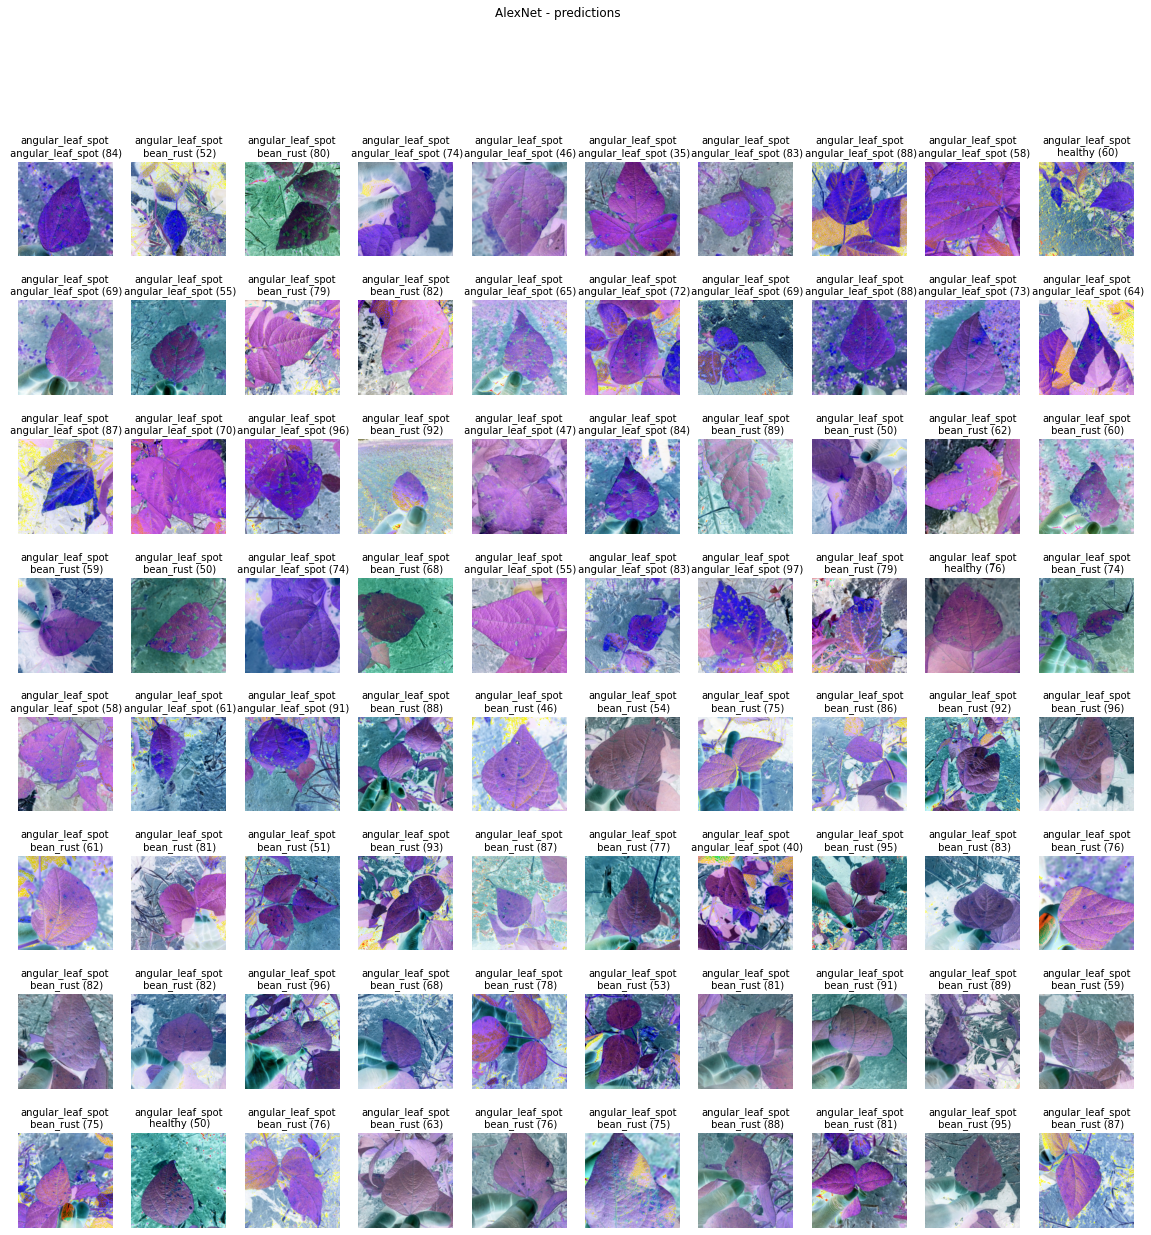

In [ ]:
ROW_IMG = 10
N_ROWS = 8

fig = plt.figure(figsize=(20, 20))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    
    with torch.no_grad():
        # error)
        model.cpu().eval()
        _, probs = model(valid_dataset[index][0].unsqueeze(0))
        
    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    title = f"{valid_dataset._number_to_labels[valid_dataset[index][1]]}\n {valid_dataset._number_to_labels[torch.argmax(probs).item()]} ({torch.max(probs * 100):.0f})"
    
    plt.title(title, fontsize=10)

fig.suptitle('AlexNet - predictions');

I've managed to tuned learning rate and get ~78% accuracy.
It's not much as from the lecture, where classification by LeNet5 for MNIST dataset gave us 98% accuracy. 

From predictions above:

👀 we have two 'healthy' leaves with quite high probabilities ~70-80% but their real classes are **angular_leaf_spot** ❗ 

See them below.

The first one has several leaves, of different branches.
The second one is a good examle of angular-leaf-spot, it's a close-up picture, but prediction is very wrong.


So model is not very accurate, but it's a way better than 3-side-coin flipping. (We have 1034 images in traindataset and three classes, roughly 33% samples for each class: 
{0: 345, 1: 348, 2: 341}).


What people achieved:
1. <https://meritocracy.is/blog/2020/06/24/object-classification-in-tensorflow/> accuracy 83.5%, twice simpler NN
2. <https://www.kaggle.com/code/viratkothari/diseases-in-bean-plant-image-classificaiton-cnn/notebook> about 85%, Transfer Learning (VGG16).
3. <https://link.springer.com/article/10.1007/s41315-021-00174-3> uses ImageSegmentation before classification, which, as I think, decreases input noise.


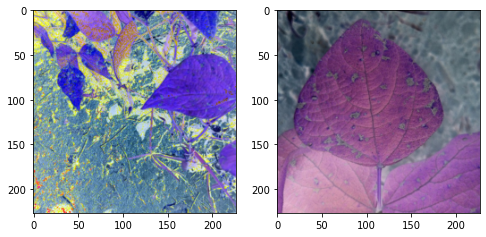

In [ ]:
plt.rcParams["figure.figsize"] = 8, 8
fig, axs = plt.subplots(1, 2)
axs[0].imshow(valid_dataset.__getitem__(10, normalize=False)[0].permute(1, 2, 0))
axs[1].imshow(valid_dataset.__getitem__(39, normalize=False)[0].permute(1, 2, 0))

An attempt to use nn.Dropout, as real [AlexNet](https://github.com/pytorch/vision/blob/main/torchvision/models/alexnet.py) suggests.
Accuracy is slightly better, I got ~80% ✊ 

In [35]:
class AlexNetDropout(nn.Module):
    def __init__(self):
        super().__init__()
        # YOUR CODE IS HERE

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(in_features=256*6*6, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=3),
        )

    def forward(self,x):
        # YOUR CODE IS HERE
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

14:52:43 --- Epoch: 0	Train loss: 1.0346	Valid loss: 0.8580	Train accuracy: 61.03	Valid accuracy: 61.65
14:53:09 --- Epoch: 1	Train loss: 0.8392	Valid loss: 0.7455	Train accuracy: 69.15	Valid accuracy: 67.67
14:53:34 --- Epoch: 2	Train loss: 0.7386	Valid loss: 0.7132	Train accuracy: 71.47	Valid accuracy: 73.68
14:53:59 --- Epoch: 3	Train loss: 0.6802	Valid loss: 0.6578	Train accuracy: 72.34	Valid accuracy: 72.93
14:54:24 --- Epoch: 4	Train loss: 0.6388	Valid loss: 0.8172	Train accuracy: 69.63	Valid accuracy: 62.41
14:54:49 --- Epoch: 5	Train loss: 0.6243	Valid loss: 0.5923	Train accuracy: 76.60	Valid accuracy: 78.95
14:55:14 --- Epoch: 6	Train loss: 0.5805	Valid loss: 0.5924	Train accuracy: 77.85	Valid accuracy: 78.20
14:55:39 --- Epoch: 7	Train loss: 0.5680	Valid loss: 0.6122	Train accuracy: 76.79	Valid accuracy: 78.95
14:56:04 --- Epoch: 8	Train loss: 0.5368	Valid loss: 0.6075	Train accuracy: 81.04	Valid accuracy: 78.95
14:56:30 --- Epoch: 9	Train loss: 0.5182	Valid loss: 0.5356	Trai

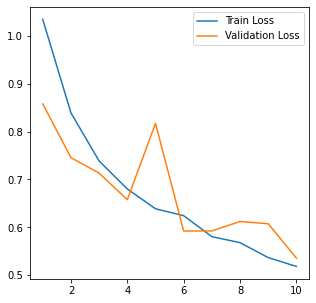

In [37]:
%%time
model = AlexNetDropout().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

## Задание 3. И снова социализация

**1 дополнительный балл**

Однажды такое уже бывало, но почему бы не повторить. Сходите погулять вместе с одногруппниками или созвонитесь в зуме, а сюда прикрепите какие-нибудь фотографии и кратко опишите, на какие темы вы общались)

Тут, как обычно, можно описать свои эмоции от выполнения этого задания:

**Ответ:**